In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

from pathlib import Path
from functools import reduce

from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [5]:
df = pd.read_csv('./../final_dfs/df_final.csv') 
df

,kreis,ags5,ags2,supermarkets_population,supermarkets_average_distance,public_transport_availability,average_distance_bus_stop,average_distance_train_station,average_distance_public_transport,Unnamed:_0,...,median_income,purchasing_power_per_household,purchasing_power_per_person,debtor_quota,household_in_income_calss_1,household_in_income_calss_2,household_in_income_calss_3,household_in_income_calss_4,household_in_income_calss_5,household_in_income_calss_6
0,"Flensburg, Stadt",1001,1,92,500,35,240,2901,240,0,...,2986,34496,19556,16.0,13209,12385,13092,5441,3096,3497
1,"Kiel, Landeshauptstadt",1002,1,92,460,37,268,2037,265,1,...,3304,35246,19612,12.1,22126,38523,39483,18567,11162,7841
2,"Lübeck, Hansestadt",1003,1,90,532,37,297,1927,294,2,...,3036,37219,20820,15.1,22881,30159,32571,15805,10999,9039
3,"Neumünster, Stadt",1004,1,85,588,37,316,1648,313,3,...,2842,38141,19561,17.9,7208,13291,10435,3812,3201,2805
4,Dithmarschen,1051,1,51,1864,35,448,3517,443,4,...,2914,46945,23486,12.8,11806,11575,17816,9873,7834,7676
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396,Saalfeld-Rudolstadt,16073,16,62,1423,37,341,2492,322,396,...,2466,39242,20959,8.3,12237,13267,19810,5653,3271,2547
397,Saale-Holzland-Kreis,16074,16,54,1677,38,343,3419,340,397,...,2288,42956,20631,7.6,5131,9216,14445,5254,3446,2379
398,Saale-Orla-Kreis,16075,16,54,1686,35,449,3172,444,398,...,2253,40511,20610,7.6,7388,7994,17082,4532,2501,1632
399,Greiz,16076,16,55,1654,38,608,2779,563,399,...,2233,40784,21275,7.8,11098,10354,18760,5324,3370,2287


In [ ]:
df = pd.read_csv('./corona_data_sets_modified/df_final.csv') 
df[df["kreis"]=="München"]

In [ ]:
df 

In [ ]:
print(', '.join(df.columns.to_numpy()))

### Scaling the data

In [ ]:
X = df.drop(["ags2","ags5","kreis"], 1)
scaler = StandardScaler()
scaler.fit(X)
scaled_data = scaler.transform(X)
X = pd.DataFrame(scaled_data, columns = X.columns)

## PCA

In [ ]:
pca = PCA(n_components=3)

In [ ]:
pca.fit(X)

In [ ]:
per_var = np.round(pca.explained_variance_ratio_* 100, decimals=1)
labels = ['PC' + str(x) for x in range(1, len(per_var)+1)]
 
plt.bar(x=range(1,len(per_var)+1), height=per_var, tick_label=labels)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title('Scree Plot')
for index,data in enumerate(per_var):
    plt.text(x=index+0.9 , y =data+1 , s=f"{data}%" , fontdict=dict(fontsize=10))
plt.show()



In [ ]:
principalComponents = pca.fit_transform(scaled_data)
PCA_components = pd.DataFrame(principalComponents)
PCA_components

### Importance of each feature

In [ ]:
pca_param = pd.DataFrame(pca.components_,columns=X.columns,index = ['PC-1','PC-2','PC-3'])
pca_param = pca_param.T


In [ ]:
pca_param['total'] = 0.71*pca_param['PC-1'] + 0.114*pca_param['PC-2'] + 0.047*pca_param['PC-3']
pca_param.sort_values(['PC-1'], ascending=[False]).head(20)

Text(0, 0.5, 'PCA 2')

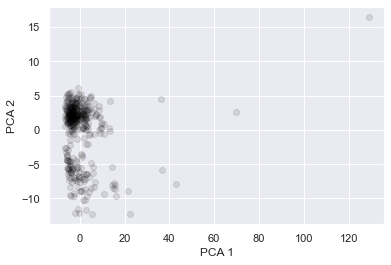

In [469]:
plt.scatter(PCA_components[0], PCA_components[1], alpha=.1, color='black')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')

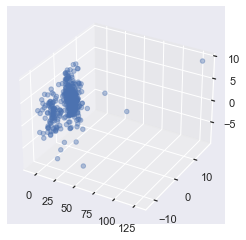

In [483]:
ax = plt.axes(projection='3d')

# Data for three-dimensional scattered points
ax.scatter3D(PCA_components[0], PCA_components[1], PCA_components[2],  alpha=.4, cmap='Greens');

## Clustering 

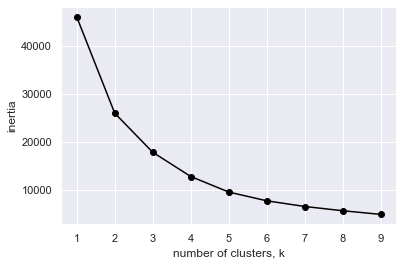

In [470]:
ks = range(1, 10)
inertias = []
for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k)
    
    # Fit model to samples
    model.fit(PCA_components.iloc[:,:3])
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
plt.plot(ks, inertias, '-o', color='black')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

In [471]:
km = KMeans(n_clusters=3).fit(X)

cluster_map = pd.DataFrame()
cluster_map['data_index'] = df.index.values
cluster_map['cluster'] = km.labels_
df = cluster_map.merge(df, left_on='data_index', right_index=True)

### Looking at the clusters

In [472]:
print(', '.join(df.loc[df['cluster'] == 0]['kreis'].to_numpy()))

Kiel, Landeshauptstadt, Lübeck, Hansestadt, Braunschweig, Hannover, Bremen, Bremerhaven, Düsseldorf, Duisburg, Essen, Krefeld, Mönchengladbach, Oberhausen, Wuppertal, Mettmann, Rhein-Kreis Neuss, Wesel, Bonn, Köln, Aachen, Rhein-Erft-Kreis, Rhein-Sieg-Kreis, Gelsenkirchen, Münster, Borken, Recklinghausen, Steinfurt, Bielefeld, Gütersloh, Bochum, Dortmund, Herne, Ennepe-Ruhr-Kreis, Märkischer Kreis, Unna, Kreisfreie Stadt Darmstadt, Kreisfreie Stadt Frankfurt am Main, Kreisfreie Stadt Offenbach am Main, Landeshauptstadt Wiesbaden, Groß-Gerau, Main-Kinzig, Offenbach, Kreisfreie Stadt Kassel, Stadt Ludwigshafen a. Rh., Stadt Mainz, Stuttgart, Böblingen, Esslingen, Ludwigsburg, Rems-Murr-Kreis, Karlsruhe, Stadt, Karlsruhe, Kreis, Heidelberg, Mannheim, Rhein-Neckar-Kreis, Freiburg im Breisgau, Ortenaukreis, München, Landeshauptstadt, Rosenheim, Stadt, München, Kreis, Regensburg, Stadt, Nürnberg, Augsburg, Stadt, Regionalverband Saarbrücken, Dresden, Leipzig, Stadt, Halle (Saale), Magdeburg,

In [473]:
df[['cluster', 'ags5']].groupby(['cluster']).agg(['count'])


,ags5
,count
cluster,
0,68
1,2
2,331


In [474]:
df.loc[df['cluster'] == 1]['kreis'].to_numpy()

array(['Hamburg', 'Berlin'], dtype=object)

In [475]:
print(', '.join(df.loc[df['cluster'] == 2]['kreis'].to_numpy()))

Flensburg, Stadt, Neumünster, Stadt, Dithmarschen, Herzogtum Lauenburg, Nordfriesland, Ostholstein, Pinneberg, Plön, Rendsburg-Eckernförde, Schleswig-Flensburg, Segeberg, Steinburg, Stormarn, Salzgitter, Wolfsburg, Gifhorn, Goslar, Helmstedt, Northeim, Peine, Wolfenbüttel, Göttingen, Diepholz, Hameln-Pyrmont, Hildesheim, Holzminden, Nienburg/Weser, Schaumburg, Celle, Cuxhaven, Harburg, Lüchow-Dannenberg, Lüneburg, Osterholz, Rotenburg (Wümme), Heidekreis, Stade, Uelzen, Verden, Delmenhorst, Emden, Oldenburg, Stadt, Osnabrück, Stadt, Wilhelmshaven, Ammerland, Aurich, Cloppenburg, Emsland, Friesland, Grafschaft Bentheim, Leer, Oldenburg, Kreis, Osnabrück, Kreis, Vechta, Wesermarsch, Wittmund, Mülheim an der Ruhr, Remscheid, Solingen, Kleve, Viersen, Leverkusen, Düren, Euskirchen, Heinsberg, Oberbergischer Kreis, Rheinisch-Bergischer Kreis, Bottrop, Coesfeld, Warendorf, Herford, Höxter, Lippe, Minden-Lübbecke, Paderborn, Hagen, Hamm, Hochsauerlandkreis, Olpe, Siegen-Wittgenstein, Soest, B

In [476]:
df.to_csv('./corona_data_sets_modified/df_final_with_clusters.csv')